In [1]:
import roboticstoolbox as rtb
import numpy as np
import numpy.linalg as LA
import sympy as sym
robot = rtb.models.DH.UR5()
print(robot)

DHRobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), dynamics, standard DH parameters
┌────┬─────────┬─────────┬────────┐
│θⱼ  │   dⱼ    │   aⱼ    │   ⍺ⱼ   │
├────┼─────────┼─────────┼────────┤
│ q1 │ 0.08946 │       0 │  90.0° │
│ q2 │       0 │  -0.425 │   0.0° │
│ q3 │       0 │ -0.3922 │   0.0° │
│ q4 │  0.1091 │       0 │  90.0° │
│ q5 │ 0.09465 │       0 │ -90.0° │
│ q6 │  0.0823 │       0 │   0.0° │
└────┴─────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬───────┬─────┬─────┬─────┬──────┬─────┐
│name │ q0    │ q1  │ q2  │ q3  │ q4   │ q5  │
├─────┼───────┼─────┼─────┼─────┼──────┼─────┤
│  qr │  180° │  0° │  0° │  0° │  90° │  0° │
│  qz │  0°   │  0° │  0° │  0° │  0°  │  0° │
└─────┴───────┴─────┴─────┴─────┴──────┴─────┘



In [2]:
robot.revolutejoints

[True, True, True, True, True, True]

In [3]:
q_set = robot.qr
print("Homogenous transformation matrix:\n",robot.fkine(q_set))

Homogenous transformation matrix:
    0         0         1         0.8996    
   1         0         0         0.1091    
   0         1         0        -0.005191  
   0         0         0         1         



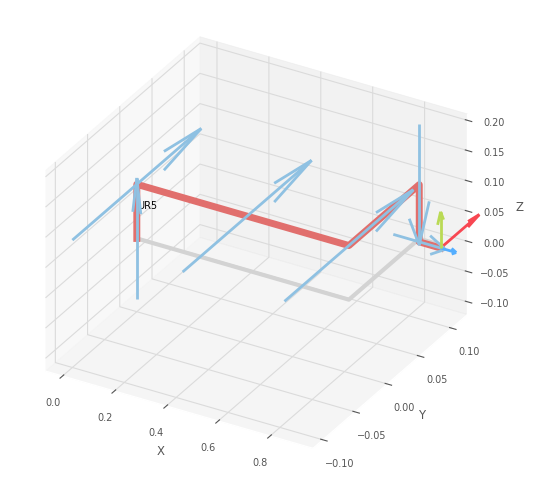

PyPlot3D backend, t = 0.05, scene:
  UR5

<Figure size 640x480 with 0 Axes>

In [4]:
robot.plot(q_set)

In [5]:
q = list(sym.symbols('q1:7'))
T = robot.fkine(q)
T_sym = sym.nsimplify(np.asarray(T),tolerance=1e-10,rational=True)
print("Homogenous transformation matrix:\n",T_sym)

Homogenous transformation matrix:
 [[(((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q4))*cos(q5) + sin(q1)*sin(q5))*cos(q6) + (-(-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*sin(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*cos(q4))*sin(q6), -(((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q4))*cos(q5) + sin(q1)*sin(q5))*sin(q6) + (-(-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*sin(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*cos(q4))*cos(q6), -((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q4))*sin(q5) + sin(q1)*cos(q5), -823*((-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*cos(q4) + (-sin(q2)*cos(q1)*cos(q3) - sin(q3)*cos(q1)*cos(q2))*sin(q4))*sin(q5)/10000 + 1893*(-sin(q2)*sin(q3)*cos(q1) + cos(q1)*cos(q2)*cos(q3))*sin

In [6]:
J = robot.jacob0(q_set)
for i in range(len(J)):
    for j in range(len(J)):
        J[i,j] = round(J[i,j],3)
print("Jacobian with respect to base frame:\n",J)

Jacobian with respect to base frame:
 [[-0.109 -0.095 -0.095 -0.095 -0.     0.   ]
 [ 0.9    0.     0.     0.    -0.082  0.   ]
 [-0.    -0.9   -0.475 -0.082 -0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.   ]
 [ 0.     1.     1.     1.     0.    -0.   ]
 [ 1.     0.     0.     0.    -1.    -0.   ]]


In [7]:
J = robot.jacobe(q_set)
for i in range(len(J)):
    for j in range(len(J)):
        J[i,j] = round(J[i,j],3)
print("Jacobian with respect to end-effector frame:\n",J)

Jacobian with respect to end-effector frame:
 [[ 0.9   -0.    -0.     0.    -0.082  0.   ]
 [-0.    -0.9   -0.475 -0.082  0.     0.   ]
 [-0.109 -0.095 -0.095 -0.095  0.     0.   ]
 [ 0.     1.     1.     1.     0.     0.   ]
 [ 1.    -0.    -0.    -0.    -1.     0.   ]
 [-0.     0.     0.     0.     0.     1.   ]]


In [8]:
q = list(sym.symbols('q1:7'))
J = robot.jacob0(q)
J_sym = sym.nsimplify(np.asarray(J),tolerance=1e-10,rational=True)
print("Jacobian:\n",J_sym)

Jacobian:
 [[(((-((-sin(q4)*sin(q6) + cos(q4)*cos(q5)*cos(q6))*sin(q3) + (sin(q4)*cos(q5)*cos(q6) + sin(q6)*cos(q4))*cos(q3))*sin(q2) + ((-sin(q4)*sin(q6) + cos(q4)*cos(q5)*cos(q6))*cos(q3) - (sin(q4)*cos(q5)*cos(q6) + sin(q6)*cos(q4))*sin(q3))*cos(q2))*sin(q1) - sin(q5)*cos(q1)*cos(q6))*((823*cos(q5)/10000 + 2183/20000)*sin(q1) + ((-(-823*sin(q4)*sin(q5)/10000 - 1893*cos(q4)/20000)*sin(q3) + (1893*sin(q4)/20000 - 823*sin(q5)*cos(q4)/10000)*cos(q3) - 1569*cos(q3)/4000)*cos(q2) - ((-823*sin(q4)*sin(q5)/10000 - 1893*cos(q4)/20000)*cos(q3) + (1893*sin(q4)/20000 - 823*sin(q5)*cos(q4)/10000)*sin(q3) - 1569*sin(q3)/4000)*sin(q2) - 17*cos(q2)/40)*cos(q1)) + (-(-((-sin(q4)*sin(q6) + cos(q4)*cos(q5)*cos(q6))*sin(q3) + (sin(q4)*cos(q5)*cos(q6) + sin(q6)*cos(q4))*cos(q3))*sin(q2) + ((-sin(q4)*sin(q6) + cos(q4)*cos(q5)*cos(q6))*cos(q3) - (sin(q4)*cos(q5)*cos(q6) + sin(q6)*cos(q4))*sin(q3))*cos(q2))*cos(q1) - sin(q1)*sin(q5)*cos(q6))*(-(823*cos(q5)/10000 + 2183/20000)*cos(q1) + ((-(-823*sin(q4)*sin

In [9]:
print("Inertia matrix:\n",robot.inertia(robot.qr))

Inertia matrix:
 [[ 3.37102433e+00  1.69310902e-02  1.69310902e-02  1.69310902e-02
  -3.04322656e-02  0.00000000e+00]
 [ 1.69310902e-02  3.24405430e+00  1.27662412e+00  4.37970563e-02
   1.65659411e-18  0.00000000e+00]
 [ 1.69310902e-02  1.27662412e+00  5.83674906e-01  2.87899206e-02
   7.37672070e-19  0.00000000e+00]
 [ 1.69310902e-02  4.37970563e-02  2.87899206e-02  1.49392170e-02
  -1.10438918e-19  0.00000000e+00]
 [-3.04322656e-02  1.65659411e-18  7.37672070e-19 -1.10438918e-19
   1.57442624e-03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [10]:
dq = [0.1,0.2,0.3,-0.4,0.5,0.6] #Velocoties
print("Coriolis matrix:\n",robot.coriolis(robot.qr, dq))

Coriolis matrix:
 [[-1.49687296e-02  1.20520353e-01  5.06435963e-02 -1.26562183e-02
   1.54167423e-03  1.73472348e-19]
 [ 1.13526215e-02  3.09959553e-02  1.77830356e-02 -1.27038337e-02
   1.35121226e-03 -2.16840434e-19]
 [ 1.13526215e-02  3.76024152e-02  2.43894954e-02 -6.09737386e-03
   1.35121226e-03 -1.08420217e-19]
 [ 1.13526215e-02  4.36997891e-02  3.04868693e-02  1.38777878e-18
   1.35121226e-03  0.00000000e+00]
 [ 7.23221622e-04  3.37803064e-04  3.37803064e-04  3.37803064e-04
   1.04748678e-20  3.82383288e-21]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [11]:
print("Grabity matrix:\n",robot.gravload(robot.qr))

Grabity matrix:
 [-3.94430453e-31 -5.41610466e+01 -1.59948983e+01 -3.46400005e-01
 -4.24217657e-17  0.00000000e+00]


In [12]:
q = robot.qr
dq = np.array([0.1,0.2,0.3,-0.4,0.5,0.6]) #Velocoties
tau = np.array([-0.1,-0.2,0.3,0.4,-0.5,0.6]) #Torques

#Matrices: 
M = robot.inertia(q)
C = robot.coriolis(q, dq)
G = robot.gravload(q)

#The Robot Canonical Equation:
d2q = LA.pinv(M)@(tau.T - G.T - C@dq.T)
print(d2q)

[  -3.7308664    42.97160589  -68.94238373   59.75458149 -389.75774531
    0.        ]


In [35]:
LA.matrix_rank(M)

5

In [16]:
q = np.array([0.1,0.2,0.3,-0.4,0.5,0.6]) 
dq = np.array([0.1,0.2,0.3,-0.4,0.5,0.6]) + 0.4
tau = np.array([-0.1,-0.2,0.3,0.4,-0.5,0.6]) #Torques

tau = robot.rne(robot.qr, np.zeros((6,)), np.zeros((6,)))

In [24]:
qdd = robot.accel(robot.qr, tau, np.array([0.1,0.1,0.1,0.1,0.1,0.1]))
qdd

LinAlgError: Singular matrix